In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

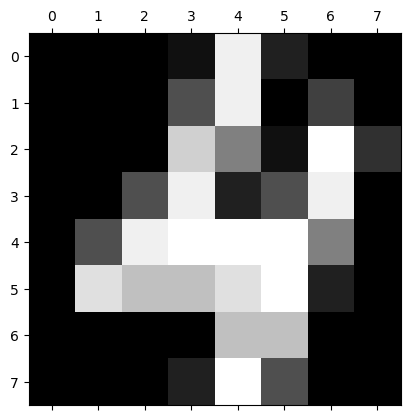

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

# KNN

In [6]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [7]:
vectors = np.array(vectors)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [9]:
X_train.shape

(4800, 784)

In [10]:
X_test.shape

(1200, 784)

In [68]:
def predict(test_point, k):
    train_data = X_train
    distances = np.zeros(train_data.shape)
    distances = np.linalg.norm(train_data - test_point, axis = 1)
    ind = np.argpartition(distances, k)[:k]
    y = np.array(y_train)
    unique, counts = np.unique(y[ind], return_counts=True)
    class_frequency = dict(zip(unique, counts))
    max_value = max(class_frequency, key=class_frequency.get)
    return max_value

In [69]:
predict(X_test[1],20)

'2'

<Figure size 640x480 with 0 Axes>

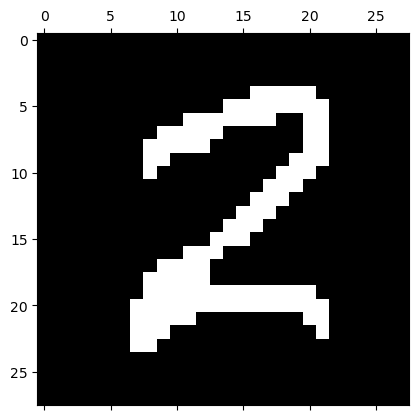

In [63]:
plt.gray()
image = np.reshape(X_test[1],(28,28))
plt.matshow(image)
plt.show()

In [73]:
def test(k):
    success = 0
    examples = X_test
    for e in range(len(examples)):
        z = predict(examples[e],k)
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

ValueError: x and y must have same first dimension, but have shapes (19,) and (20,)

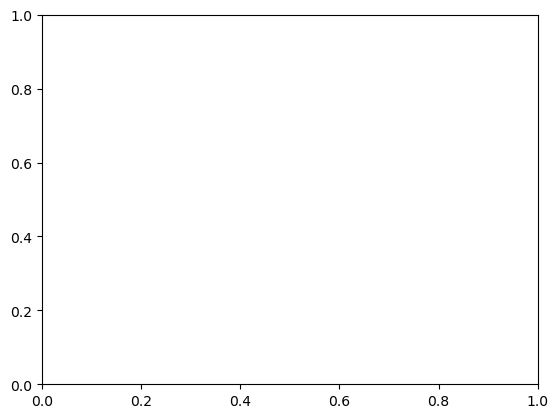

In [75]:
max_k = 20
accuracies = np.zeros(max_k)
for k in np.arange(1,max_k):
    accuracies[k] = test(k)

Max accuraccy is 0.935 with k = 2


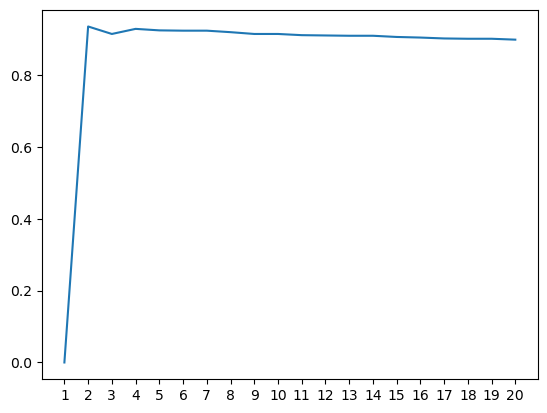

In [83]:
x = np.arange(1,max_k+1)
y = accuracies
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)
plt.xticks(default_x_ticks, x)
print('Max accuraccy is', max(accuracies), 'with k =',np.argmax(accuracies)+1)

## Prostate

In [13]:
import pandas as pd

In [18]:
prostate_data = pd.read_csv('prostate.csv')
prostate_data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509


In [15]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.

# Perceptron

In [16]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [17]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

IndentationError: expected an indented block after 'if' statement on line 8 (2579002564.py, line 10)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)